In [12]:
#例23.1

In [13]:
import numpy as np 
from scipy.optimize import linprog
import matplotlib.pyplot as plt
c=np.array([2,3])
c=-c
A=np.array([[1,2],[4,0],[0,4]])
b=np.array([8,16,12])
#取A为A的负矩阵的转置
A=(-A).T
result=linprog(c=b,A_ub=A,b_ub=c,method='simplex')
result.success,result.x.round(3),result.fun.round(3)

(True, array([1.5  , 0.125, 0.   ]), 14.0)

In [14]:
#例23.2

In [15]:
c=np.array([2,3,-5,1])
A_ub=np.array([
               [-1,-1,3,-1],
               [2,0,2,-1]
             ])
b_ub=np.array([-5,4])
A_eq=np.array([[0,1,1,1]])
b_eq=np.array([6])
result=linprog(c=c,A_ub=A_ub,b_ub=b_ub,\
              A_eq=A_eq,b_eq=b_eq,\
    bounds=[(None,0),(0,None),(0,None),(None,None)])
result.success,result.x.round(3),result.fun.round(3)

(True, array([-1.,  0.,  0.,  6.]), 4.0)

In [16]:
c=np.array([5,4,6])
c=-c
A_ub=np.array([[-1,-2,0],[1,0,1],[-3,2,1]])
b_ub=np.array([-2,3,-5])
A_eq=np.array([[1,-1,1]])
b_eq=np.array([1])
result=linprog(c=c,A_ub=A_ub,b_ub=b_ub,\
    A_eq=A_eq,b_eq=b_eq,\
    bounds=[(0,None),(None,0),(None,None)])
result.success,result.x.round(3),-result.fun.round(3)

(True, array([ 2., -0., -1.]), 4.0)

In [17]:
#例23.3

In [18]:
c=np.array([1,1,0])
C=-c
A_ub=np.array([[-1,1,1],[-2,1,-1]])
b_ub=np.array([2,1])
#价值向量是linprog函数的必填参数，既可以写成c=C,也可以直接写为C
result_1=linprog(C,A_ub=A_ub,b_ub=b_ub)
result_1.success,result_1.x,-result_1.fun

(False,
 array([3.69202533e+09, 1.50247736e+09, 1.07300027e+09]),
 5194502688.953184)

In [19]:
result_2=linprog(c=b_ub,A_ub=A_ub.T,b_ub=c)
result_2.success,result_2.x.round(3),result_2.fun

(True, array([0., 0.]), 5.103354446526835e-10)

In [20]:
#例23.4

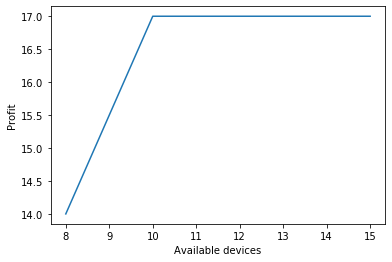

In [21]:
c=np.array([-2,-3])
A_ub=np.array([[1,2],[4,0],[0,4]])
b_ub=np.array([8,16,12])
device_lim=[]
profit=[]
for i in range(8):
    device_lim.append(b_ub[0])
    profit.append(-linprog(c,A_ub=A_ub,b_ub=b_ub).fun)
    b_ub[0]+=1
plt.plot(device_lim,profit)
plt.xlabel('Available devices')
plt.ylabel('Profit')
plt.show()

In [22]:
c=np.array([-2,0])
A_ub=np.array([[1,2],[4,0],[0,4]])
b_ub=np.array([8,16,12])
for _ in range(11):
    result=linprog(c=c,A_ub=A_ub,b_ub=b_ub)
    print('c2={}\tx={}\tfun={}'.format(-c[1],\
        result.x.round(3),-result.fun.round(3)))
    c[1]-=1

c2=0	x=[4.    1.192]	fun=8.0
c2=1	x=[4. 2.]	fun=10.0
c2=2	x=[4. 2.]	fun=12.0
c2=3	x=[4. 2.]	fun=14.0
c2=4	x=[2.921 2.539]	fun=16.0
c2=5	x=[2. 3.]	fun=19.0
c2=6	x=[2. 3.]	fun=22.0
c2=7	x=[2. 3.]	fun=25.0
c2=8	x=[2. 3.]	fun=28.0
c2=9	x=[2. 3.]	fun=31.0
c2=10	x=[2. 3.]	fun=34.0


In [23]:
c=[-2,-3,-5]
A_ub_new=np.array([[1,2,2],[4,0,6],[0,4,3]])
b_ub=np.array([8,16,12])
result=linprog(c,A_ub=A_ub_new,b_ub=b_ub,method='simplex')
result.x.round(3),-result.fun.round(3)

(array([1. , 1.5, 2. ]), 16.5)

In [24]:
#例23.5

In [25]:
A=np.array([[1,0],[0,2],[3,2]])
b=np.array([4,12,18])
for t in range(10):
    c=np.array([-3-2*t,t-5])
    result=linprog(c,A_ub=A,b_ub=b)
    print(t,result.x.round(3),-result.fun.round(3))

0 [2. 6.] 36.0
1 [2. 6.] 34.0
2 [4. 3.] 37.0
3 [4. 3.] 42.0
4 [4. 3.] 47.0
5 [4.    1.537] 52.0
6 [4. 0.] 60.0
7 [4. 0.] 68.0
8 [4. 0.] 76.0
9 [4. 0.] 84.0


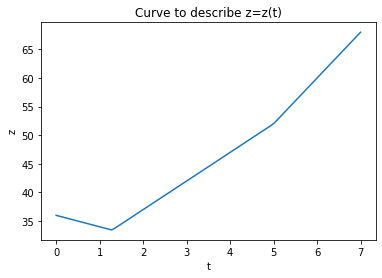

In [26]:
tt=[]
funs=[]
A=np.array([[1,0],[0,2],[3,2]])
b=np.array([4,12,18])
for t in np.linspace(0,7,100):
    c=np.array([-3-2*t,t-5])
    result=linprog(c,A_ub=A,b_ub=b)
    if result.success:
        tt.append(t)
        funs.append(-result.fun)
plt.plot(tt,funs)
plt.xlabel('t')
plt.ylabel('z')
plt.title('Curve to describe z=z(t)')
plt.show()

In [27]:
#例23.6

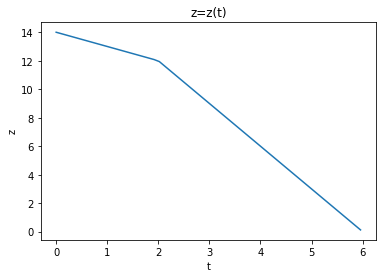

In [28]:
tt=[]
funs=[]
c=np.array([-1,-3])
A=np.array([[1,1],[-1,2]])
for t in np.linspace(0,10,100):
    b=np.array([6-t,6+t])
    result=linprog(c,A_ub=A,b_ub=b)
    if result.success:
        tt.append(t)
        funs.append(-result.fun)
plt.plot(tt,funs)
plt.xlabel('t')
plt.ylabel('z')
plt.title('z=z(t)')
plt.show()